In [10]:
import pandas as pd

# Load the Excel file
file_path = file_path = "C:/Users/user/Downloads/loan_data_set.xlsx"

df = pd.read_excel(file_path)

# Display the first few rows and column names to understand the structure
df.head(), df.columns


(    Loan_ID Gender Married Dependents     Education Self_Employed  \
 0  LP001002   Male      No          0      Graduate            No   
 1  LP001003   Male     Yes          1      Graduate            No   
 2  LP001005   Male     Yes          0      Graduate           Yes   
 3  LP001006   Male     Yes          0  Not Graduate            No   
 4  LP001008   Male      No          0      Graduate            No   
 
    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
 0             5849                  0         NaN             360.0   
 1             4583               1508       128.0             360.0   
 2             3000                  0        66.0             360.0   
 3             2583               2358       120.0             360.0   
 4             6000                  0       141.0             360.0   
 
    Credit_History Property_Area Loan_Status  
 0             1.0         Urban           Y  
 1             1.0         Rural           N  
 2 

In [16]:
import pandas as pd
import warnings

# Hilangkan warning FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Baca file Excel
file_path = r"C:\Users\user\Downloads\loan_data_set.xlsx"
df = pd.read_excel(file_path)

# Bersihkan kolom Dependents: ubah '3+' jadi 3, buang nilai kosong, ubah ke integer
df['Dependents'] = df['Dependents'].replace('3+', 3).infer_objects(copy=False)
df = df[df['Dependents'].notna()]
df['Dependents'] = df['Dependents'].astype(int)

# a. Probabilitas nasabah yang menikah dan punya tanggungan > 1
total_nasabah = len(df)
married_dependents = df[(df['Married'] == 'Yes') & (df['Dependents'] > 1)]
prob_a = len(married_dependents) / total_nasabah

# b. Probabilitas nasabah tinggal di kawasan Urban dan penghasilan di atas rata-rata
avg_income = df['ApplicantIncome'].mean()
urban_high_income = df[(df['Property_Area'] == 'Urban') & (df['ApplicantIncome'] > avg_income)]
prob_b = len(urban_high_income) / total_nasabah

# Cetak hasilnya
print(f"Probabilitas a (Menikah & tanggungan > 1): {prob_a:.2%}")
print(f"Probabilitas b (Urban & penghasilan > rata-rata): {prob_b:.2%}")


Probabilitas a (Menikah & tanggungan > 1): 22.87%
Probabilitas b (Urban & penghasilan > rata-rata): 9.35%


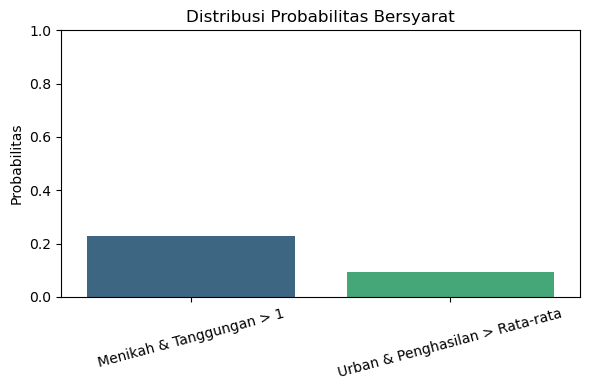

Loan_Status          N         Y
Education                       
Graduate      0.292111  0.707889
Not Graduate  0.376923  0.623077


<Figure size 1000x600 with 0 Axes>

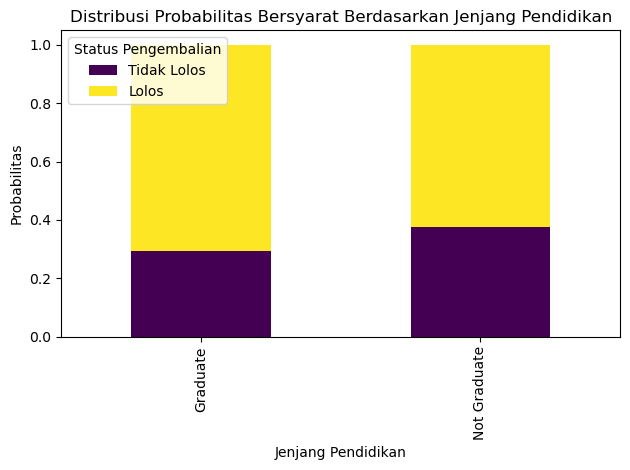

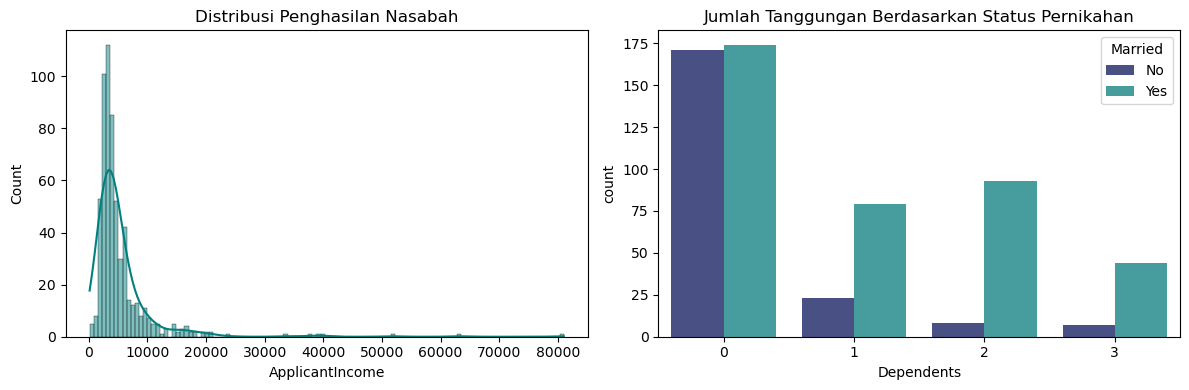

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Tampilkan grafik di Jupyter Notebook
%matplotlib inline

# Hilangkan warning FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load data
file_path = r"C:\Users\user\Downloads\loan_data_set.xlsx"
df = pd.read_excel(file_path)

# Bersihkan kolom Dependents (ubah '3+' menjadi 3 dan mengubah ke tipe integer)
df['Dependents'] = df['Dependents'].replace('3+', 3).infer_objects(copy=False)
df = df[df['Dependents'].notna()]
df['Dependents'] = df['Dependents'].astype(int)

# 1. Probabilitas a: Nasabah yang sudah menikah dan memiliki tanggungan lebih dari 1
total_nasabah = len(df)
married_dependents = df[(df['Married'] == 'Yes') & (df['Dependents'] > 1)]
prob_a = len(married_dependents) / total_nasabah

# 2. Probabilitas b: Nasabah yang memiliki rumah di Kawasan perkotaan dan penghasilan di atas rata-rata
avg_income = df['ApplicantIncome'].mean()
urban_high_income = df[(df['Property_Area'] == 'Urban') & (df['ApplicantIncome'] > avg_income)]
prob_b = len(urban_high_income) / total_nasabah

# --- Visualisasi distribusi probabilitas ---
# 1. Bar plot untuk probabilitas a dan b
plt.figure(figsize=(6, 4))
sns.barplot(x=["Menikah & Tanggungan > 1", "Urban & Penghasilan > Rata-rata"],
            y=[prob_a, prob_b],
            palette="viridis")
plt.ylabel("Probabilitas")
plt.ylim(0, 1)
plt.title("Distribusi Probabilitas Bersyarat")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# 2. Visualisasi distribusi probabilitas bersyarat berdasarkan jenjang pendidikan
# Menghitung distribusi probabilitas berdasarkan kategori pendidikan dan status pengembalian
probabilitas_berdasarkan_pendidikan = df.groupby(['Education', 'Loan_Status']).size().unstack(fill_value=0)

# Normalisasi nilai agar menjadi probabilitas
probabilitas_berdasarkan_pendidikan = probabilitas_berdasarkan_pendidikan.div(probabilitas_berdasarkan_pendidikan.sum(axis=1), axis=0)

# Menampilkan hasil probabilitas bersyarat berdasarkan pendidikan
print(probabilitas_berdasarkan_pendidikan)

# Membuat visualisasi distribusi probabilitas bersyarat berdasarkan jenjang pendidikan
plt.figure(figsize=(10, 6))
probabilitas_berdasarkan_pendidikan.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribusi Probabilitas Bersyarat Berdasarkan Jenjang Pendidikan')
plt.xlabel('Jenjang Pendidikan')
plt.ylabel('Probabilitas')
plt.legend(title='Status Pengembalian', loc='upper left', labels=['Tidak Lolos', 'Lolos'])
plt.tight_layout()
plt.show()

# 3. Visualisasi tambahan (opsional): Distribusi penghasilan & tanggungan
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['ApplicantIncome'], kde=True, ax=axes[0], color='teal')
axes[0].set_title("Distribusi Penghasilan Nasabah")

sns.countplot(x='Dependents', hue='Married', data=df, palette='mako', ax=axes[1])
axes[1].set_title("Jumlah Tanggungan Berdasarkan Status Pernikahan")

plt.tight_layout()
plt.show()
